In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2,  1, 3, 3, 1, 2]], dtype = np.float64)
y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [3]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [4]:
X_st = X.copy()
X_st[2, :] = calc_std_feat(X[2, :])

In [5]:
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  2.        ,  5.        ,  3.        ,
         0.        ,  5.        , 10.        ,  1.        ,  2.        ],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  2.        ,
         1.        ,  3.        ,  3.        ,  1.        ,  2.        ]])

1. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

In [6]:
def calc_logloss(y, y_pred):
    err = - np.mean(y * np.log(y_pred, where=(y_pred!=0))
                    + (1.0 - y) * np.log(1.0 - y_pred, where=(y_pred!=1)))
    return np.sum(err)

In [7]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

In [8]:
def eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    errors = []
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
        #if i % (iterations / 500) == 0:
        #    print(i, W, err)
        errors.append(err)
    errors = np.array(errors)
    return W, errors, errors[-1]

In [9]:
W = eval_model(X_st, y, iterations=5000, alpha=1e-2)[0]

In [10]:
W

array([-1.33877824, -0.91225125,  0.82169045,  2.38341031])

Text(0, 0.5, 'MSE')

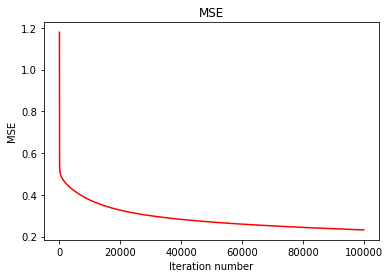

In [11]:
plt.plot(range(len(eval_model(X_st, y, iterations = 100000, alpha = 1e-2)[1])), 
         eval_model(X_st, y, iterations = 100000, alpha = 1e-2)[1], c='r')
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

In [12]:
def calc_pred_proba(W, X):
    z = np.dot(W, X)
    return sigmoid(z)

In [13]:
y_pred_proba = calc_pred_proba(W, X_st)

In [14]:
y_pred_proba

array([0.33792862, 0.41735882, 0.77246141, 0.0154879 , 0.81700825,
       0.6787608 , 0.89471594, 0.17162867, 0.31923991, 0.8383367 ])

4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [15]:
def calc_pred(W, X):
    y_pred = np.zeros(X.shape[1])
    y_pred_proba = calc_pred_proba(W, X)
    for i, num in enumerate(y_pred_proba):
        if num < 0.5:
            y_pred[i] = 0
        else:
            y_pred[i] = 1
    return y_pred

In [16]:
y_pred = calc_pred(W, X_st)

In [17]:
y_pred

array([0., 0., 1., 0., 1., 1., 1., 0., 0., 1.])

5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.

In [18]:
# для достоверности воспользуемся метриками из библиотеки sklearn.metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [19]:
# Accuracy
def accuracy(y, y_pred):
    return len(y_pred[y == y_pred])/len(y_pred)

In [20]:
accuracy(y, y_pred)

0.8

In [21]:
accuracy(y, y_pred) == accuracy_score(y, y_pred)

True

In [22]:
# матрица ошибок
def confusion_mx(y, y_pred):
    TP = len(y_pred[(y == y_pred)&(y_pred == 1)])
    FP = len(y_pred[(y != y_pred)&(y_pred == 1)])
    FN = len(y_pred[(y != y_pred)&(y_pred == 0)])
    TN = len(y_pred[(y == y_pred)&(y_pred == 0)])
    conf_matrix = pd.DataFrame.from_dict(
        {'y_pred': ['a(x) = +1', 'a(x) = -1'], 
         'y = +1': [TP, FN], 
         'y = -1': [FP, TN]}).set_index('y_pred')
    return conf_matrix

In [23]:
confusion_mx(y, y_pred)

,y = +1,y = -1
y_pred,,
a(x) = +1,4,1
a(x) = -1,1,4


In [24]:
confusion_matrix(y, y_pred)

array([[4, 1],
       [1, 4]], dtype=int64)

In [25]:
# точность
def precision(y, y_pred):
    return len(y_pred[(y == y_pred)&(y == 1)])/(len(y_pred[(y == y_pred)&(y == 1)])
                                                +len(y_pred[(y != y_pred)&(y == 1)]))

In [26]:
precision(y, y_pred)

0.8

In [27]:
precision(y, y_pred) == precision_score(y, y_pred)

True

In [28]:
# полнтота
def recall(y, y_pred):
    return len(y_pred[(y == y_pred)&(y == 1)])/(len(y_pred[(y == y_pred)&(y == 1)])
                                                +len(y_pred[(y != y_pred)&(y ==0)]))

In [29]:
recall(y, y_pred)

0.8

In [30]:
recall_score(y, y_pred) == recall(y, y_pred)

True

In [31]:
# F1 score
def f1(y, y_pred):
    return 2*precision(y, y_pred)*recall(y, y_pred)/(precision(y, y_pred)+recall(y, y_pred))

In [32]:
f1(y, y_pred)

0.8000000000000002

In [33]:
f1_score(y, y_pred) == f1(y, y_pred)

True

6. Могла ли модель переобучиться? Почему?

Из-за малого количества данных модель переобучилась.

7. (опция)Создайте функции eval_model_l1 и eval_model_l2 с применением L1 и L2 регуляризаций соответственно.

In [34]:
def eval_model_l1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    errors = []
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T) + lambda_*np.sign(W))
        #if i % (iterations / 500) == 0:
        #    print(i, W, err)
        errors.append(err)
    errors = np.array(errors)
    return W, errors, errors[-1] 

In [35]:
def eval_model_l2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    errors = []
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T) + 2*lambda_*W)
        #if i % (iterations / 500) == 0:
        #    print(i, W, err)
        errors.append(err)
    errors = np.array(errors)
    return W, errors, errors[-1]

Text(0, 0.5, 'MSE')

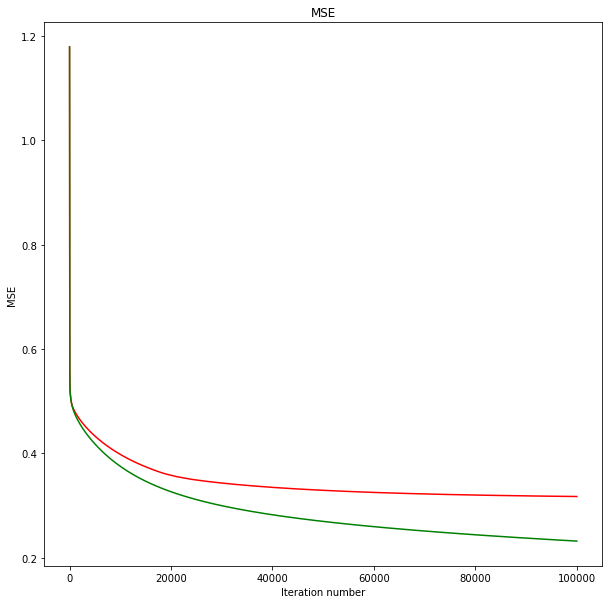

In [36]:
plt.figure(figsize=(10, 10))
plt.plot(range(len(eval_model_l1(X_st, y, iterations = 100000, alpha = 1e-2, lambda_=1e-2)[1])), 
         eval_model_l1(X_st, y, iterations = 100000, alpha = 1e-2, lambda_=1e-2)[1], c='r')
plt.plot(range(len(eval_model_l2(X_st, y, iterations = 100000, alpha = 1e-2, lambda_=1e-8)[1])), 
         eval_model_l2(X_st, y, iterations = 100000, alpha = 1e-2, lambda_=1e-8)[1], c='g')
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')